Atalov S.

Fundamentals of Machine Learning and Artificial Intelligence


---

## Part 1. Logistic Regression

#### Logistic Regression:

It's a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome.
The outcome is measured with a dichotomous variable (where there are only two possible outcomes).
It estimates the probability that a given instance belongs to a certain class.

**Use Case**: Consider a medical scenario where we want to predict whether a patient has a certain disease (binary outcome: yes or no) based on their clinical parameters like blood pressure, cholesterol levels, etc. Logistic Regression is ideal for this binary classification task.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

### 0. Data Preparing

In [34]:

# Load the iris dataset
file_path = './iris_train.csv'
iris_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
iris_df.head()


,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [35]:
# Preprocess the data
iris_df['Species'] = iris_df['Species'].replace({
    'Iris-setosa': 0,
    'Iris-virginica': 1
})

# Define features and target
X = iris_df[['PetalLengthCm', 'PetalWidthCm']]
y = iris_df['Species']

### 1. Logistic Regression Model

In [36]:
# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [37]:
# Coefficients
coef = log_reg.coef_[0]
intercept = log_reg.intercept_

In [38]:
coef

array([1.96708295, 0.88991157])

In [39]:
intercept

array([-7.66403587])

### 2. Decision Boundary

1. **Logistic Regression Model:**
   - In logistic regression, the decision boundary is where the model outputs a probability of 0.5. For a two-dimensional dataset like ours (using `PetalLengthCm` and `PetalWidthCm`), the decision boundary can be represented as a line.
   - The logistic regression model can be expressed as: $\log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2$
     - Here, $p$ is the probability of the positive class (in our case, Iris-setosa).
     - $\beta_0, \beta_1, \beta_2$ are the model's intercept and coefficients, respectively.
     - $x_1$ and $x_2$ are the features (PetalLengthCm and PetalWidthCm).

2. **Decision Boundary:**
   - At the decision boundary, $p = 0.5$. Therefore, $\log\left(\frac{p}{1-p}\right) = 0$.
   - This simplifies the equation to: $0 = \beta_0 + \beta_1 x_1 + \beta_2 x_2$.
   - Rearranging for $x_2$ (which corresponds to `PetalWidthCm` in our dataset), we get: $x_2 = -\frac{\beta_1}{\beta_2} x_1 - \frac{\beta_0}{\beta_2}$.

3. **Code Explanation:**
   - `coef` contains the coefficients $\beta_1$ and $\beta_2$ (`coef[0]` and `coef[1]`, respectively).
   - `intercept` represents $\beta_0$.
   - `x_values` represents an array of x-values (PetalLengthCm) over which we want to plot the decision boundary.
   - `y_values` is calculated using the rearranged equation above, representing the corresponding y-values (PetalWidthCm) on the decision boundary. 

Therefore, the line `y_values = -(x_values * coef[0] + intercept) / coef[1]` calculates the y-values of the decision boundary for a given set of x-values, based on the trained logistic regression model's coefficients and intercept. This enables us to plot the linear decision boundary on the scatter plot.

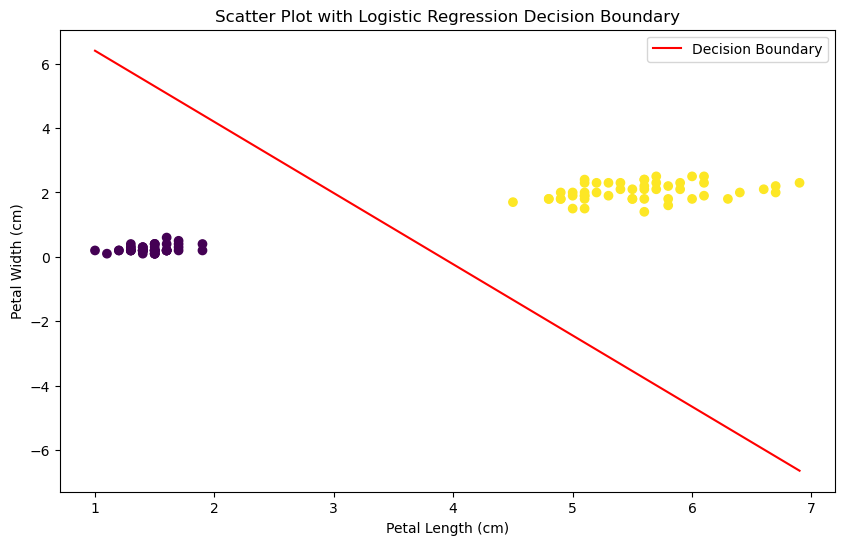

In [22]:

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(x=iris_df['PetalLengthCm'], y=iris_df['PetalWidthCm'], c=iris_df['Species'])

# Logistic Regression decision boundary
x_values = np.array([min(X['PetalLengthCm']), max(X['PetalLengthCm'])])
y_values = -(x_values * coef[0] + intercept) / coef[1]
plt.plot(x_values, y_values, label="Decision Boundary", color='red')

plt.title('Scatter Plot with Logistic Regression Decision Boundary')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()


### 3. Test Data

In [23]:
iris_test = pd.read_csv('./iris_test.csv')
iris_test.head()

,PetalLengthCm,PetalWidthCm
0,2,0.5
1,5,2.3
2,1,0.7
3,4,1.5
4,7,1.0


In [24]:
# predict probability

log_reg.predict_proba(iris_test)

array([[9.63907637e-01, 3.60923633e-02],
       [1.45117933e-02, 9.85488207e-01],
       [9.93781662e-01, 6.21833825e-03],
       [1.76656940e-01, 8.23343060e-01],
       [9.15196293e-04, 9.99084804e-01]])

In [25]:
log_reg.predict_proba(iris_test).round()

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [26]:
log_reg.predict(iris_test)

array([0, 1, 0, 1, 1], dtype=int64)

---
## Part 2. kNN vs Logistic Regression

Objective:

Build KNN and Logistic Regression models to predict admission status based on exam scores. Compare their performance using accuracy.

#### Steps:

1. **Data Exploration:**
   - Load the dataset.
   - Perform basic data exploration (summary statistics, check for missing values).

2. **Data Preprocessing:**
   - Split the data into features (`X`: Exam1 Score, Exam2 Score) and target (`y`: Admission).
   - Split the dataset into training and testing sets (e.g., 70% train, 30% test).

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
```


3. **K-Nearest Neighbors (KNN):**
   - Train a KNN model using the training set.
   - Choose an appropriate value for `n_neighbors` (e.g., start with 5).
   - Predict admission status on the test set.
   - Evaluate the model's accuracy.

4. **Logistic Regression:**
   - Train a Logistic Regression model using the training set.
   - Predict admission status on the test set.
   - Evaluate the model's accuracy.

5. **Comparison:**
   - Compare the accuracy of both models.
   - Discuss which model performed better and hypothesize why.



#### Evaluation Metrics:
- Primary metric: Accuracy.
- Additional metrics (optional for advanced students): Precision, Recall, F1-Score.



In [27]:
df = pd.read_csv("exam_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Exam1 Score  100 non-null    float64
 1   Exam2 Score  100 non-null    float64
 2   Admission    100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [28]:
x = df[['Exam1 Score','Exam2 Score']]
y = df['Admission']



In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [30]:
import matplotlib.pyplot as plt

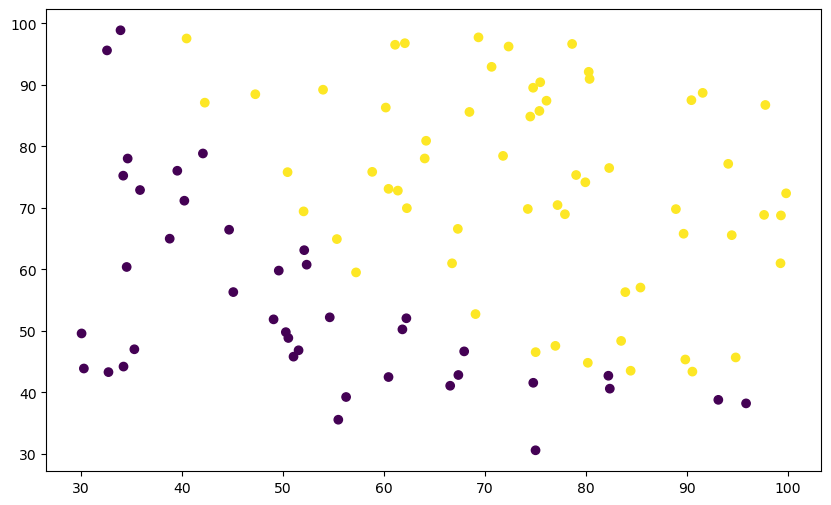

In [31]:
plt.figure(figsize = (10, 6));
plt.scatter(x = df['Exam1 Score'], y = df['Exam2 Score'], c = df['Admission'])

In [32]:
duka_log_reg = LogisticRegression()
duka_log_reg.fit(X, y)

LogisticRegression()